In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

In [2]:
import pandas as pd
data = pd.read_csv(r'canada.csv')
df = pd.DataFrame(data, columns = ['Postcode','Borough','Neighbourhood'])

print (df)

    Postcode           Borough  \
0        M4S   Central Toronto   
1        M4P   Central Toronto   
2        M4V   Central Toronto   
3        M5P   Central Toronto   
4        M4V   Central Toronto   
5        M5P   Central Toronto   
6        M4N   Central Toronto   
7        M4T   Central Toronto   
8        M5R   Central Toronto   
9        M4R   Central Toronto   
10       M4V   Central Toronto   
11       M5N   Central Toronto   
12       M4V   Central Toronto   
13       M4T   Central Toronto   
14       M4V   Central Toronto   
15       M5R   Central Toronto   
16       M5R   Central Toronto   
17       M5H  Downtown Toronto   
18       M5V  Downtown Toronto   
19       M5E  Downtown Toronto   
20       M4X  Downtown Toronto   
21       M5G  Downtown Toronto   
22       M5T  Downtown Toronto   
23       M6G  Downtown Toronto   
24       M4Y  Downtown Toronto   
25       M5V  Downtown Toronto   
26       M5L  Downtown Toronto   
27       M5K  Downtown Toronto   
28       M5X  

### The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [3]:
searchfor = ['Not assigned']
df = df[~df.Borough.str.contains('|'.join(searchfor))]

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [4]:
NBH = list(map(str, df.Neighbourhood.tolist()))
BOR = list(map(str, df.Borough.tolist()))
df['Neighbourhood'] = df.Neighbourhood.replace(to_replace=['Not assigned'], value=[BOR])

print(df.tail(60))

    Postcode       Borough             Neighbourhood
227      M9A  Queen's Park              Queen's Park
228      M1S   Scarborough                 Agincourt
229      M1V   Scarborough           Agincourt North
230      M1N   Scarborough               Birch Cliff
231      M1H   Scarborough                 Cedarbrae
232      M1L   Scarborough                  Clairlea
233      M1T   Scarborough            Clarks Corners
234      M1M   Scarborough                Cliffcrest
235      M1M   Scarborough                 Cliffside
236      M1N   Scarborough            Cliffside West
237      M1P   Scarborough               Dorset Park
238      M1K   Scarborough      East Birchmount Park
239      M1L   Scarborough               Golden Mile
240      M1E   Scarborough                 Guildwood
241      M1C   Scarborough            Highland Creek
242      M1K   Scarborough                   Ionview
243      M1K   Scarborough              Kennedy Park
244      M1V   Scarborough           L'Amoreau

In [5]:
df.shape #In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

(210, 3)

In [6]:
df2 = pd.read_csv(r'Geospatial.csv')

Let's take a look at the first item in this list.

In [7]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 17.2MB/s ta 0:00:01
     |████████████████████████████████| 829kB 31.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 17.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


Then let's loop through the data and fill the dataframe one row at a time.

In [8]:
def get_latlng(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    return lat_lng_coords
    
get_latlng('M9A')

[43.66229908300005, -79.52819499999998]

In [21]:
coords = [get_latlng(postal_code) for postal_code in df.Postcode.tolist()]

In [10]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [11]:
df.dropna(subset=['Latitude'],axis=0,inplace=True)
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4S,Central Toronto,Davisville,43.703395,-79.385964
1,M4P,Central Toronto,Davisville North,43.712755,-79.388514
2,M4V,Central Toronto,Deer Park,43.686074,-79.402265
3,M5P,Central Toronto,Forest Hill North,43.694785,-79.414405
4,M4V,Central Toronto,Forest Hill SE,43.686074,-79.402265
5,M5P,Central Toronto,Forest Hill West,43.694785,-79.414405
6,M4N,Central Toronto,Lawrence Park,43.728420,-79.387133
7,M4T,Central Toronto,Moore Park,43.690685,-79.382946
8,M5R,Central Toronto,North Midtown,43.674840,-79.403768
9,M4R,Central Toronto,North Toronto West,43.714523,-79.406960


In [12]:
df.shape

(150, 5)

In [13]:
geo_data=df[df['Borough'].str.contains("Toronto")]
geo_data.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4S,Central Toronto,Davisville,43.703395,-79.385964
1,M4P,Central Toronto,Davisville North,43.712755,-79.388514
2,M4V,Central Toronto,Deer Park,43.686074,-79.402265
3,M5P,Central Toronto,Forest Hill North,43.694785,-79.414405
4,M4V,Central Toronto,Forest Hill SE,43.686074,-79.402265
5,M5P,Central Toronto,Forest Hill West,43.694785,-79.414405
6,M4N,Central Toronto,Lawrence Park,43.728420,-79.387133
7,M4T,Central Toronto,Moore Park,43.690685,-79.382946
8,M5R,Central Toronto,North Midtown,43.674840,-79.403768
9,M4R,Central Toronto,North Toronto West,43.714523,-79.406960


In [14]:
CLIENT_ID = 'S53CJZIRH3J3ELBJNTTS5DPC1WMJAE3FS4PUGI1ZRICMVD5I' # your Foursquare ID
CLIENT_SECRET = 'MOFG4EAWB1OXCUU5M0CM3RPNWP3VDZVZGP434NRXJ4SKIPMC' # your Foursquare Secret
VERSION = '20180604'

In [15]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

## 2. Explore Neighborhoods in Toronto
Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues

In [17]:
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Davisville
Davisville North
Deer Park
Forest Hill North
Forest Hill SE
Forest Hill West
Lawrence Park
Moore Park
North Midtown
North Toronto West
Rathnelly
Roselawn
South Hill
Summerhill East
Summerhill West
The Annex
Yorkville
Adelaide
Bathurst Quay
Berczy Park
Cabbagetown
Central Bay Street
Chinatown
Christie
Church and Wellesley
CN Tower
Commerce Court
Design Exchange
First Canadian Place
Garden District
Grange Park
Harbord
Harbourfront
Harbourfront East
Harbourfront West
Island airport
Kensington Market
King
King and Spadina
Queen's Park
Railway Lands
Richmond
Rosedale
Ryerson
South Niagara
St. James Town
St. James Town
Stn A PO Boxes 25 The Esplanade
Toronto Dominion Centre
Toronto Islands
Underground city
Union Station
University of Toronto
Victoria Hotel
Business Reply Mail Processing Centre 969 Eastern
India Bazaar
Riverdale
Studio District
The Beaches
The Beaches West
The Danforth West
East Toronto
Leaside
Parkview Hill
Thorncliffe Park
Woodbine Gardens
Woodbine Heights
Albion

Let's check how many venues were returned for each neighborhood

In [18]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Adelaide,100,100,100,100,100,100
Albion Gardens,16,16,16,16,16,16
Alderwood,4,4,4,4,4,4
Bathurst Manor,1,1,1,1,1,1
Bathurst Quay,71,71,71,71,71,71
Bayview Village,4,4,4,4,4,4
Beaumond Heights,16,16,16,16,16,16
Bedford Park,22,22,22,22,22,22
Berczy Park,61,61,61,61,61,61


In [19]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 242 uniques categories.


In [20]:
toronto_venues['Venue Category'].unique()[:30]

array(['Dessert Shop', 'Café', 'Indian Restaurant', 'Gym',
       'Italian Restaurant', 'Park', 'Seafood Restaurant',
       'Sandwich Place', 'Pizza Place', 'Thai Restaurant',
       'Sushi Restaurant', 'Coffee Shop', 'Diner', 'Toy / Game Store',
       'Gas Station', 'Restaurant', 'Farmers Market',
       'Fast Food Restaurant', 'Asian Restaurant', 'Spa',
       'Indoor Play Area', 'Food & Drink Shop', 'Breakfast Spot',
       'Department Store', 'Hotel', 'Liquor Store', 'Supermarket',
       'Light Rail Station', 'Lake', 'Swim School'], dtype=object)

## 3. Analyze Each Neighborhood

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Quad,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Davisville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Davisville,0,0,0,

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [114]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Quad,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Adelaide,0.000000,0.000000,0.00,0.030000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.030000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.01,0.030000,0.000000,0.000000,0.000000,0.000000,0.01,0.030000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000

let's confirm the new size

In [37]:
venue_counts = toronto_onehot.groupby('Neighbourhood').sum()

In [34]:
venue_counts_described = venue_counts.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:20]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Coffee Shop,147.0,2.448980,3.778424,0.0,0.0,1.0,2.5,16.0
Clothing Store,147.0,0.517007,1.952707,0.0,0.0,0.0,0.0,11.0
Restaurant,147.0,0.659864,1.274065,0.0,0.0,0.0,1.0,8.0
Café,147.0,1.190476,2.041801,0.0,0.0,0.0,2.0,8.0
Hotel,147.0,0.625850,1.601416,0.0,0.0,0.0,0.0,7.0
Bakery,147.0,0.523810,1.015856,0.0,0.0,0.0,1.0,6.0
Fast Food Restaurant,147.0,0.387755,0.863641,0.0,0.0,0.0,1.0,5.0
Italian Restaurant,147.0,0.680272,1.287380,0.0,0.0,0.0,1.0,5.0
Bar,147.0,0.564626,1.211068,0.0,0.0,0.0,0.0,5.0
Breakfast Spot,147.0,0.258503,0.662999,0.0,0.0,0.0,0.0,4.0


In [86]:
Toronto_Venues_Top15 = toronto_venues['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
Toronto_Venues_Top15 =Toronto_Venues_Top15.reset_index()
Toronto_Venues_Top15.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Toronto_Venues_Top15

,Venue_Category,Frequency
0,Coffee Shop,360
1,Café,175
2,Italian Restaurant,100
3,Restaurant,97
4,Hotel,92
5,Bar,83
6,Bakery,77
7,Clothing Store,76
8,Sandwich Place,73
9,Japanese Restaurant,72


In [56]:
toronto_resto = toronto_grouped[["Neighbourhood", "Restaurant", 'Coffee Shop','Hotel','Bar']]
toronto_resto.head()

,Neighbourhood,Restaurant,Coffee Shop,Hotel,Bar
0,Adelaide,0.030000,0.070000,0.050000,0.030000
1,Albion Gardens,0.000000,0.062500,0.000000,0.000000
2,Alderwood,0.000000,0.000000,0.000000,0.000000
3,Bathurst Manor,0.000000,0.000000,0.000000,0.000000
4,Bathurst Quay,0.028169,0.112676,0.014085,0.042254


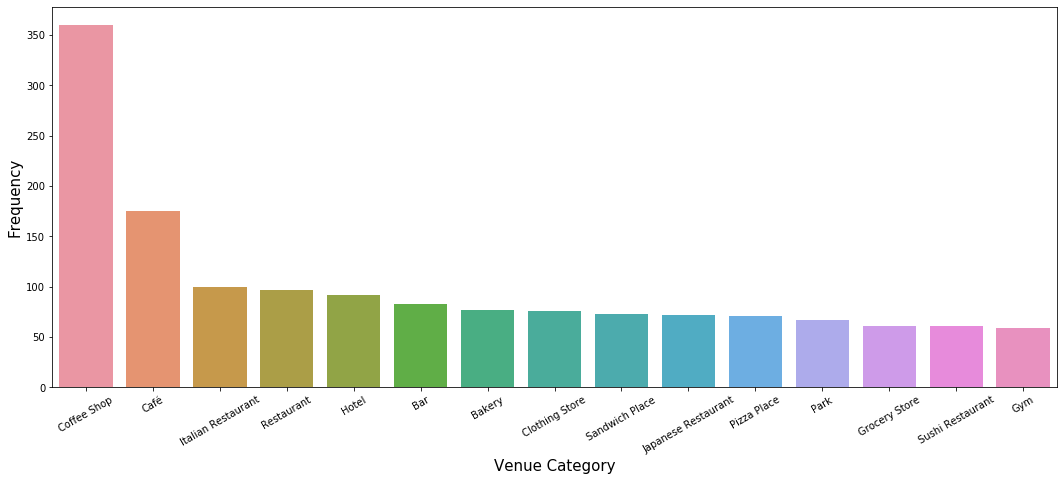

In [87]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Toronto_Venues_Top15)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

Let's print each neighborhood along with the top 5 most common venues

In [89]:
import folium
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

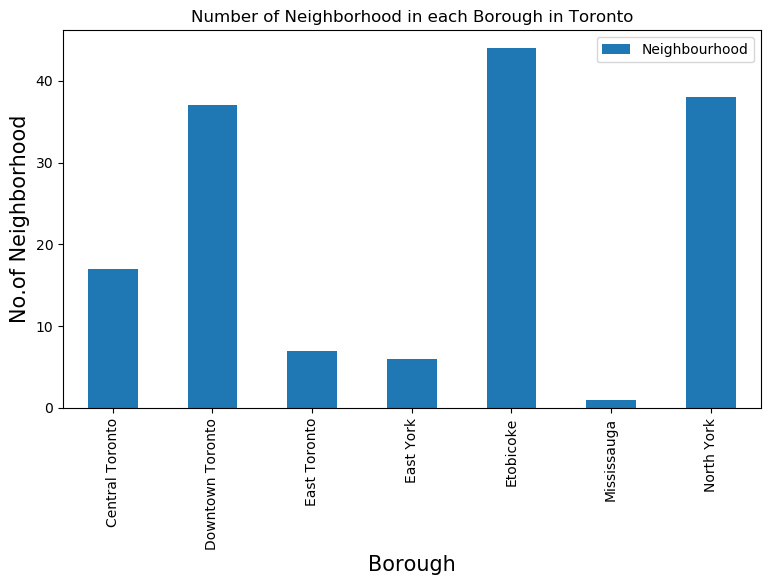

In [90]:
import seaborn as sns

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood in each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [97]:
toronto_part=toronto_grouped[['Neighbourhood', 'Restaurant']]

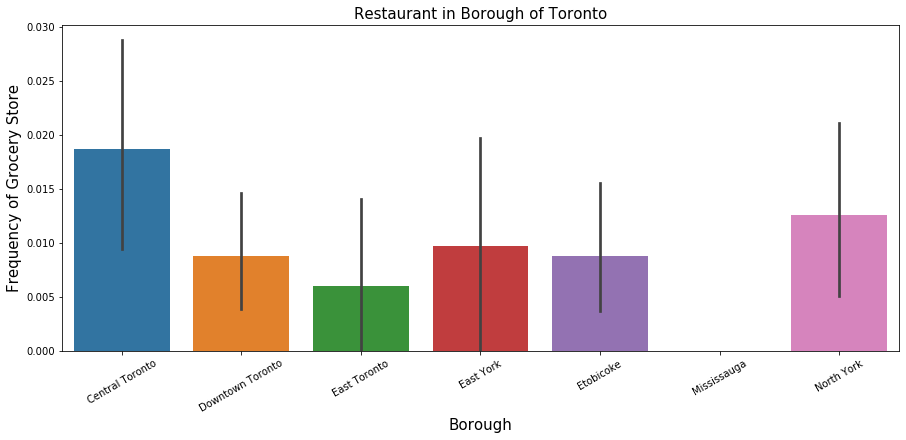

In [98]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,6))
s=sns.barplot(y=toronto_part['Restaurant'], x="Borough", data=toronto_merged);
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Restaurant in Borough of Toronto', fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.ylabel ("Frequency of Grocery Store", fontsize=15)
plt.show()

In [99]:
toronto_part.max()

Neighbourhood    Yorkville
Restaurant        0.111111
dtype: object

In [102]:
toronto_merged = pd.merge(df, toronto_part, on='Neighbourhood')
toronto_merged.max()

Postcode                M9W
Borough          North York
Neighbourhood     Yorkville
Latitude            43.8028
Longitude          -79.2954
Restaurant         0.111111
dtype: object

In [103]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


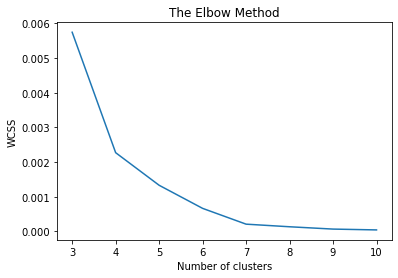

In [105]:
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

toronto_clustering = toronto_part.drop('Neighbourhood', 1)


wcss = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter= 50)
    kmeans.fit(toronto_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [106]:
kclusters = 5

toronto_clustering = toronto_part.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 0, 0, 0, 4, 0, 0, 1, 1, 0, 4, 0, 4, 3, 4, 4, 4, 0, 3, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0,
       4, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0,
       0, 4, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1], dtype=int32)

In [109]:
toronto_merged = toronto_part.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_
# merge toronto_merged with df_torontoto add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df.set_index("Neighbourhood"), on="Neighbourhood")

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(148, 7)


,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
0,Adelaide,0.030000,4,M5H,Downtown Toronto,43.649700,-79.382582
1,Albion Gardens,0.000000,0,M9V,Etobicoke,43.743145,-79.584664
2,Alderwood,0.000000,0,M8W,Etobicoke,43.601131,-79.538785
3,Bathurst Manor,0.000000,0,M3H,North York,43.757875,-79.448688
4,Bathurst Quay,0.028169,4,M5V,Downtown Toronto,43.640815,-79.399538


In [111]:
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(148, 7)


,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
73,Markland Wood,0.000000,0,M9C,Etobicoke,43.648573,-79.578250
2,Alderwood,0.000000,0,M8W,Etobicoke,43.601131,-79.538785
3,Bathurst Manor,0.000000,0,M3H,North York,43.757875,-79.448688
144,York Mills West,0.000000,0,M2P,North York,43.747895,-79.399919
6,Beaumond Heights,0.000000,0,M9V,Etobicoke,43.743145,-79.584664
143,Woodbine Heights,0.000000,0,M4C,East York,43.689640,-79.306874
142,Woodbine Gardens,0.000000,0,M4B,East York,43.707535,-79.311773
9,Bloordale Gardens,0.000000,0,M9C,Etobicoke,43.648573,-79.578250
141,Wilson Heights,0.000000,0,M3H,North York,43.757875,-79.448688
11,CFB Toronto,0.000000,0,M3K,North York,43.738685,-79.467320


In [113]:
import folium
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster Neighborhoods

### Cluster 1

In [115]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
73,Markland Wood,0.0,0,M9C,Etobicoke,43.648573,-79.578250
2,Alderwood,0.0,0,M8W,Etobicoke,43.601131,-79.538785
3,Bathurst Manor,0.0,0,M3H,North York,43.757875,-79.448688
144,York Mills West,0.0,0,M2P,North York,43.747895,-79.399919
6,Beaumond Heights,0.0,0,M9V,Etobicoke,43.743145,-79.584664
143,Woodbine Heights,0.0,0,M4C,East York,43.689640,-79.306874
142,Woodbine Gardens,0.0,0,M4B,East York,43.707535,-79.311773
9,Bloordale Gardens,0.0,0,M9C,Etobicoke,43.648573,-79.578250
141,Wilson Heights,0.0,0,M3H,North York,43.757875,-79.448688
11,CFB Toronto,0.0,0,M3K,North York,43.738685,-79.467320


In [116]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0].count()

Neighbourhood     104
Restaurant        104
Cluster Labels    104
Postcode          104
Borough           104
Latitude          104
Longitude         104
dtype: int64

### Cluster 2

In [117]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
20,Commerce Court,0.040000,1,M5L,Downtown Toronto,43.648395,-79.378865
69,Lawrence Manor East,0.045455,1,M5M,North York,43.735460,-79.419148
24,Design Exchange,0.040000,1,M5K,Downtown Toronto,43.647100,-79.381531
21,Davisville,0.035714,1,M4S,Central Toronto,43.703395,-79.385964
84,North Midtown,0.038462,1,M5R,Central Toronto,43.674840,-79.403768
7,Bedford Park,0.045455,1,M5M,North York,43.735460,-79.419148
8,Berczy Park,0.032787,1,M5E,Downtown Toronto,43.645160,-79.373675
146,Yorkville,0.038462,1,M5R,Central Toronto,43.674840,-79.403768
134,Victoria Hotel,0.040000,1,M5L,Downtown Toronto,43.648395,-79.378865
128,Toronto Dominion Centre,0.040000,1,M5K,Downtown Toronto,43.647100,-79.381531


In [118]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1].count()

Neighbourhood     13
Restaurant        13
Cluster Labels    13
Postcode          13
Borough           13
Latitude          13
Longitude         13
dtype: int64

### Cluster 3

In [119]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
88,Northwood Park,0.111111,2,M3J,North York,43.764765,-79.488094
145,York University,0.111111,2,M3J,North York,43.764765,-79.488094


In [120]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2].count()

Neighbourhood     2
Restaurant        2
Cluster Labels    2
Postcode          2
Borough           2
Latitude          2
Longitude         2
dtype: int64

### Cluster 4

In [121]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
13,Cabbagetown,0.078947,3,M4X,Downtown Toronto,43.668160,-79.366602
112,St. James Town,0.057971,3,M5C,Downtown Toronto,43.651210,-79.375481
112,St. James Town,0.057971,3,M4X,Downtown Toronto,43.668160,-79.366602
18,Church and Wellesley,0.051282,3,M4Y,Downtown Toronto,43.666585,-79.381302
132,University of Toronto,0.055556,3,M5S,Downtown Toronto,43.663110,-79.401801
45,Harbord,0.055556,3,M5S,Downtown Toronto,43.663110,-79.401801


In [122]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3].count()

Neighbourhood     6
Restaurant        6
Cluster Labels    6
Postcode          6
Borough           6
Latitude          6
Longitude         6
dtype: int64

### Cluster 5

In [123]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Neighbourhood,Restaurant,Cluster Labels,Postcode,Borough,Latitude,Longitude
61,King,0.030000,4,M5H,Downtown Toronto,43.649700,-79.382582
97,Railway Lands,0.028169,4,M5V,Downtown Toronto,43.640815,-79.399538
96,Queen's Park,0.020408,4,M7A,Downtown Toronto,43.661150,-79.391715
114,Stn A PO Boxes 25 The Esplanade,0.020000,4,M5W,Downtown Toronto,43.648690,-79.385440
71,Leaside,0.028571,4,M4G,East York,43.709495,-79.363989
99,Richmond,0.030000,4,M5H,Downtown Toronto,43.649700,-79.382582
68,Lawrence Manor,0.018182,4,M6A,North York,43.723270,-79.451286
67,Lawrence Heights,0.018182,4,M6A,North York,43.723270,-79.451286
62,King and Spadina,0.028169,4,M5V,Downtown Toronto,43.640815,-79.399538
60,Kensington Market,0.013889,4,M5T,Downtown Toronto,43.653530,-79.397233


In [124]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4].count()

Neighbourhood     23
Restaurant        23
Cluster Labels    23
Postcode          23
Borough           23
Latitude          23
Longitude         23
dtype: int64